<a href="https://colab.research.google.com/github/leandrofigueiraalmeida/BP-Rossmann-Sales-Model/blob/main/LFA_Fraudes_TransacoPagamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Challenge: Fraud Detection on  Transactions of Payments


### Developer:         Leandro Figueira de Almeida
### Date:           09/07/2023
### Linkedin:    https://www.linkedin.com/in/leandro-figueira-de-almeida/
### Phone:    19 - 98181 5364
### Email:         leandro.figueira.almeida@gmailcom

# 1° What's Business Problem

> You are a Data Scientist at **Hotmart** , has as its Mission to transform content creators into entrepreneurs.

> Among the various tool solutions for content creators, Hotmart offers its **Payment Gateway Service**.

> See that payment page where we put the **purchase transaction data**?

> Its aim is to Create a Predictive Machine to Detect Transactions that are possibly FRAUDULENT**.



# 2° Exploratory Data Analysis

* Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Bibliotecas utilizadas na Construção da Aplicação
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

* Loading Data

In [3]:
#Importação dos Dados
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Repos/Deteccao_Fraude_Transacoes_Pagamento/fraud.csv')

* Checking Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


* Reading Data

In [5]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

* Data Dimensions

In [6]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 6362620
Number of Cols: 11


* Data Types

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

* Check NA

In [8]:
# Verificando valores missing  e linhas duplicadas
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* Descriptive Statistical

In [9]:
# Estatísticas descritivas das variáveis
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

* Exploring the correlations of the variables with the target variablet

In [10]:
# Checking correlation - Checando as Correlações do Target
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

<ipython-input-10-e69d68c8c169>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


* Exploring the correlations all variables

In [11]:
df.corr(method='spearman')

<ipython-input-11-657b2ea90450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.000836      -0.006145       -0.010716   
amount          0.000836  1.000000       0.047642       -0.070543   
oldbalanceOrg  -0.006145  0.047642       1.000000        0.803180   
newbalanceOrig -0.010716 -0.070543       0.803180        1.000000   
oldbalanceDest -0.004526  0.595401       0.024034        0.044433   
newbalanceDest -0.005315  0.670118      -0.008188       -0.094429   
isFraud         0.020819  0.036060       0.039430       -0.028031   
isFlaggedFraud  0.002122  0.002653       0.002463        0.002662   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                 -0.004526       -0.005315  0.020819        0.002122  
amount                0.595401        0.670118  0.036060        0.002653  
oldbalanceOrg         0.024034       -0.008188  0.039430        0.002463  
newbalanceOrig        0.044433       -0.094429 -0.028031        0.002662  
oldbalanceDest        1.000000        0.935802 -0.017141       -0.001644  
newbalanceDest        0.935802        1.000000 -0.005182       -0.001743  
isFraud              -0.017141       -0.005182  1.000000        0.044109  
isFlaggedFraud       -0.001644       -0.001743  0.044109        1.000000

* Exploring Transaction Type "type"

In [12]:
# Explorando o Tipo de Transação "type"
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [13]:
# Explorando o Tipo de Transação "type"
type = df["type"].value_counts()

# Dashboard

In [14]:
# Explorando o Tipo de Transação "type" e Criando Gráfico de Rosca
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

* Install DATAPREP

In [15]:
#Instalação do Pacote
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 94.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.7 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1268258 sha256=8b26c576f832c1d62308d3f3ef2fda27f5d469b491d124a0d83cfd5dbe122822
  Stored in directory: /root

* DATAPREP Report

Computing reset_index-849beaf91c766e378968135df92faf70:   9%|▊         | 582/6707 [02:05<1:05:34,  1.56it/s]                                           /usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5279: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



DataPrep Report
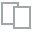
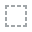
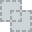
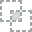
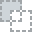
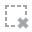
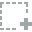
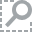
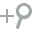
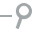
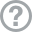
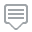
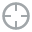
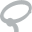
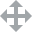
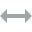
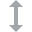
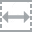
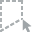
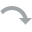
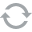
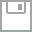
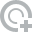
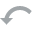
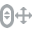
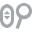
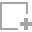
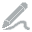
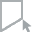
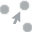
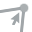
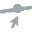

In [16]:
# Relatório Automatizado
from dataprep.eda import create_report
create_report(df)

# 3° Data Preparation

* Change types

In [17]:
# Fazendo conversão de object para número
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})


In [18]:
# Alterando a Label para a saída ficar visível
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


Loading new Data

In [19]:
df

step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     2     9839.64  C1231006815      170136.00       160296.36   
1           1     2     1864.28  C1666544295       21249.00        19384.72   
2           1     4      181.00  C1305486145         181.00            0.00   
3           1     1      181.00   C840083671         181.00            0.00   
4           1     2    11668.14  C2048537720       41554.00        29885.86   
...       ...   ...         ...          ...            ...             ...   
6362615   743     1   339682.13   C786484425      339682.13            0.00   
6362616   743     4  6311409.28  C1529008245     6311409.28            0.00   
6362617   743     1  6311409.28  C1162922333     6311409.28            0.00   
6362618   743     4   850002.52  C1685995037      850002.52            0.00   
6362619   743     1   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0        M1979787155            0.00            0.00  No Fraud               0  
1        M2044282225            0.00            0.00  No Fraud               0  
2         C553264065            0.00            0.00     Fraud               0  
3          C38997010        21182.00            0.00     Fraud               0  
4        M1230701703            0.00            0.00  No Fraud               0  
...              ...             ...             ...       ...             ...  
6362615   C776919290            0.00       339682.13     Fraud               0  
6362616  C1881841831            0.00            0.00     Fraud               0  
6362617  C1365125890        68488.84      6379898.11     Fraud               0  
6362618  C2080388513            0.00            0.00     Fraud               0  
6362619   C873221189      6510099.11      7360101.63     Fraud               0  

[6362620 rows x 11 columns]

* Data Describe

In [21]:
# Estatística dos Campos
df.describe().T

count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
type            6362620.0  2.055307e+00  9.808966e-01  1.0      1.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   
isFlaggedFraud  6362620.0  2.514687e-06  1.585775e-03  0.0      0.00   

                       50%           75%           max  
step               239.000  3.350000e+02  7.430000e+02  
type                 2.000  3.000000e+00  5.000000e+00  
amount           74871.940  2.087215e+05  9.244552e+07  
oldbalanceOrg    14208.000  1.073152e+05  5.958504e+07  
newbalanceOrig       0.000  1.442584e+05  4.958504e+07  
oldbalanceDest  132705.665  9.430367e+05  3.560159e+08  
newbalanceDest  214661.440  1.111909e+06  3.561793e+08  
isFlaggedFraud       0.000  0.000000e+00  1.000000e+00

* Target Variable

In [22]:
# Avaliando o Target
df.isFraud.value_counts()

No Fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64

In [23]:
# Separando as Variáveis Explicativas (x) da variável Target (y)
from sklearn.model_selection import train_test_split
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

# 4° Predictive Machine to Fraud Detection

* Data Training and Predictive Machine

In [24]:
# Treinando a Máquina Preditiva com Machine Learning
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
#print(model.score(xtest, ytest))

DecisionTreeClassifier()

In [25]:
# Fazendo novas Predições com dados de Teste
y_pred = model.predict(xtest)

In [26]:
y_pred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

# 5° Evaluating Predictive Machine

* Evaluate Model

In [27]:
# Evaluate model - Avaliando a Máquina Preditiva (Modelo)
print('Métricas do Classification Report: \n', classification_report(ytest, y_pred))
print('Acurácia: \n', accuracy_score(ytest, y_pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, y_pred))

Métricas do Classification Report: 
               precision    recall  f1-score   support

       Fraud       0.91      0.88      0.89       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.95      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262

Acurácia: 
 0.999732814469511
Confusion Matrix: 
 [[   722     95]
 [    75 635370]]


In [28]:
print('Acurácia: \n', accuracy_score(ytest, y_pred))

Acurácia: 
 0.999732814469511


### New Predictions

#### Case 1

In [29]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


#### Case 2

In [30]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2, 5000, 5000, 0.0]])
print(model.predict(features))

['No Fraud']


In [31]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[1, 5000, 5000, 0.0]])
print(model.predict(features))

['No Fraud']
